### 슬라이싱을 통해서 rgb 밝기 표현하기

In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw ,Image

In [3]:
sp.norm(78,12).pdf(80)

0.032786643008494994

In [50]:
sp.norm(0, 1).pdf(0.4  )

0.36827014030332333

(116, 105, 3)
9
255
19
9.0
255.0
19.0
0.0


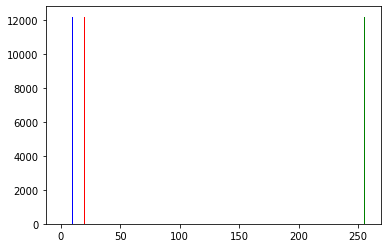

In [57]:
train = cv2.imread("patch2.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

print(np.mean(b) )
print(np.mean(g) )
print(np.mean(r) )

t = 7
#평균0이고 표준편차가1인 정규분포에서 평균이 9일때 7이 나오는 확률분포값. !
p= sp.norm(0,1).pdf(  (9 - 7)/(np.std(b)+0.0001))
print(p)

In [ ]:
prob = sp.norm(maxg, 6).pdf(252) 
print(prob)

In [ ]:
t= 7
p = sp.norm(0,1).pdf( (9 - 7) / 4 )# 평균이 9일때 7이 나올 확률
print(p)

In [ ]:
test = cv2.imread("zoo.jpg")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/5)
        prob += norm.pdf((test[r,c,1]-maxg)/6)
        prob += norm.pdf((test[r,c,2]-maxr)/6)        
        if prob > 0.2 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

### 크리핑 하는 기법
 * for문

In [72]:
def calc(value, img2) :
    img2 = np.array(img2, dtype= 'int')
    for i in range(0, img2.shape[0]):
        for j in range(0, img2.shape[1]):
            if img2[i,j]+value  > 255:
                #print(1)
                img2[i,j] = 255
            else :
                img2[i,j] = img2[i,j]+value
                
    img2 = np.array(img2, dtype = 'uint8')
    return img2


(512, 512)
[[139 133 130 ...  39  39  39]
 [136 136 136 ...  39  39  34]
 [133 133 132 ...  39  43  39]
 ...
 [106 109 118 ...  50  46  43]
 [103 111 116 ...  50  43  39]
 [103 111 117 ...  43  34  34]]
235
135
235


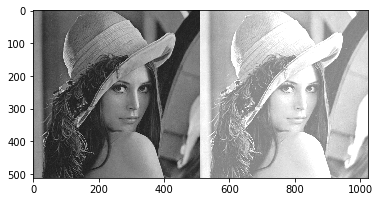

In [71]:
img = cv2.imread("lena.png" , cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(img)
img2 = img
img2 = calc(100,img2)
print(img[50,0])
print(img2[50,0])
plt.imshow(np.hstack([img,img2]), cmap ='gray')

* 파이썬 스타일

(512, 512)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.int32'>
<class 'numpy.int32'>


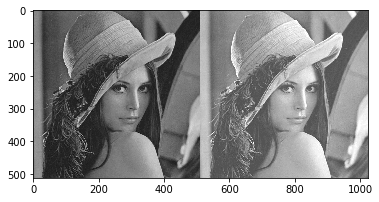

In [73]:
img = cv2.imread("lena.png" , cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(type(img))
print(type(img[0,0]))
imgint = np.array(img, dtype= 'int')
print(type(imint[0,0]))
img2 = imgint +50
img2 = np.clip(img2, 0,255)
img2 = np.array(img2, dtype = 'uint8')
print(type(imgint[0,0]))
#plt.imshow(img2, cmap="gray")
plt.imshow(np.hstack([img,img2]), cmap ='gray')



 * cliping 연습

In [74]:
a= np.array([250,254],dtype ='uint8')
b = a+10
print(b)
a= np.array([250,20,255] , dtype="int")
b = a+10
print(b)
c = np.clip(b,0,255)
print(c)
d = np.array(c, dtype = 'uint8')
print(d)
np.clip(b,0,255)

e = [1,1.0,2]
f = np.array(e)

print(type(e[0]))
print(type(e[1]))
print(type(f[0]))
print(type(f[1])) # 넘파이는 고속처리를 위해 타입을 동일 형태로 맞춘다.

[4 8]
[260  30 265]
[255  30 255]
[255  30 255]
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


### 곱셈연산

(512, 512)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
<class 'numpy.int32'>
<class 'numpy.int32'>


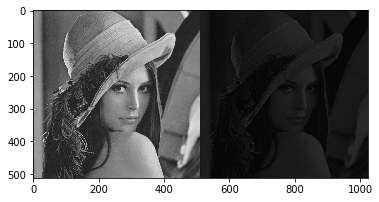

In [75]:
img = cv2.imread("lena.png" , cv2.IMREAD_GRAYSCALE)
print(img.shape)

img2 = img.astype(np.float32)
img2 *=0.2
img2 = np.clip(img2, 0,255).astype(np.uint8)

print(type(imgint[0,0]))
#plt.imshow(img2, cmap="gray")
plt.imshow(np.hstack([img,img2]), cmap ='gray')

### 선형변환과 비선형변환
사칙연산은 선형변환이다. 
곱셈 : 선의 기울기 변환
덧셈 : ..
lut (룩업테이블, 매핑테이블) :
포스터라이징 
70~80 - > B


### 룩업테이블 만들기(리스트)

In [82]:

lut1 = [x  for x in range(10)]
print(lut1)

lut2 = [x+5 for x in range(10)]
print(lut2)
# 비 효율적인 방법 
lut1 = []
for i in range(256):
    lut1.append(i)
print(lut1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 20

In [84]:
#img2 = np.clip(img2, 0,255)
lut1 = [x  for x in range(10)]
print(lut1)

lut2 = [np.clip(x+5,5,9) for x in range(10)]
print(lut2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


In [85]:
test= np.clip([1,2,3,4,5,6,7,8,9], 0,5)
test

array([1, 2, 3, 4, 5, 5, 5, 5, 5])

In [91]:
#img2 = np.clip(img2, 0,255)
lut1 = [x  for x in range(10)]
print(lut1)

lut2 = [ 9 if x+5>9 else x+5 for x in range(10)]
print(lut2)

def addlut(op):
    return [x+op if x+op <255 else 255 for x in range(256)]
    
def mullut(op):
    return [x*op if x*op <255 else 255 for x in range(256)]
    
print(addlut(5))
    
print(mullutl(1.5))

SyntaxError: invalid syntax (<ipython-input-91-b87f5f2d8567>, line 9)

[[166 159 156 ...  46  46  46]
 [163 163 163 ...  46  46  40]
 [159 159 158 ...  46  51  46]
 ...
 [127 130 141 ...  60  55  51]
 [123 133 139 ...  60  51  46]
 [123 133 140 ...  51  40  40]]


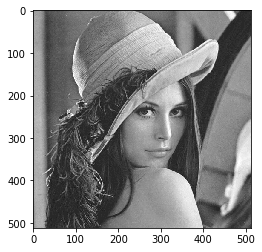

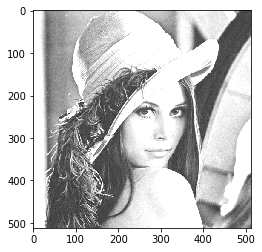

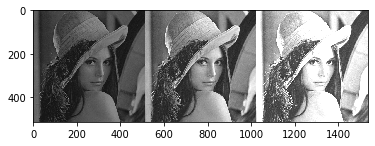

In [99]:
def mullut(op):
    return np.array([x*op if x*op <255 else 255 for x in range(256)]).astype('uint8')
    
src2 = cv2.LUT(img,mullut(1.2)) # 이미지 사이즈 만큼.
print(src2)
plt.imshow(src2, cmap ='gray')
plt.show()
src2 = cv2.LUT(img, mullut(2.0))
plt.imshow(src2, cmap='gray')
plt.show()
all = np.hstack([cv2.LUT(img,mullut(0.7)),
                 cv2.LUT(img,mullut(1.2)),
                 cv2.LUT(img,mullut(2.0))
                         ])
plt.imshow(all, cmap ='gray')

In [11]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

def binaryLUT(value):
    return np.array([255 if x>value else 0 for x in range(256)]).astype('uint8')

def ntLUT():
    return np.array([255-x for x in range(256)]).astype('uint8')

def gammaLUT(gamma):
    invGamma = 1.0/gamma
    return np.array([ ((i/255.0)** invGamma)*255 for i in range(256)])

def binaryLUT2(t):
    return np.array([ (x>t)*255 for x in range(256)]).astype('uint8')

def posterlut(l):
    return np.array([int(x/l)*l  for x in range(256)]).astype('uint8') #max값 128
    

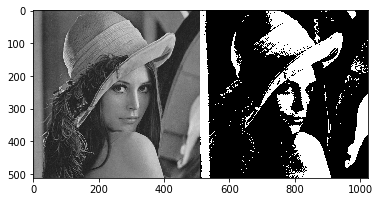

In [12]:
bimg = cv2.LUT(img,binaryLUT2(128))
plt.imshow(np.hstack([img,bimg]), cmap = 'gray')

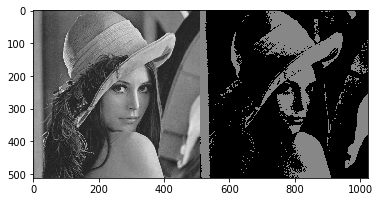

In [13]:
bimg = cv2.LUT(img,posterlut(128))
plt.imshow(np.hstack([img,bimg]), cmap = 'gray')

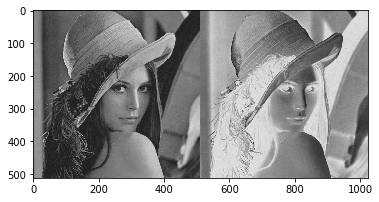

In [14]:
bimg = cv2.LUT(img,ntLUT())
plt.imshow(np.hstack([img,bimg]), cmap = 'gray')

### 감마보정
https://programmingfbf7290.tistory.com/entry/%EC%98%81%EC%83%81%EC%9D%98-%EA%B4%91%ED%95%99%EC%A0%81-%EB%B3%80%ED%99%982-%EA%B0%90%EB%A7%88-%EB%B3%B4%EC%A0%95

In [43]:
#감마 확인
arr= np.array([1,2,3,4,5])
bimg = cv2.LUT(arr,gammaLUT(2.2))
print(bimg)

error: OpenCV(4.1.2) C:\projects\opencv-python\opencv\modules\core\src\lut.cpp:368: error: (-215:Assertion failed) (lutcn == cn || lutcn == 1) && _lut.total() == 256 && _lut.isContinuous() && (depth == CV_8U || depth == CV_8S) in function 'cv::LUT'


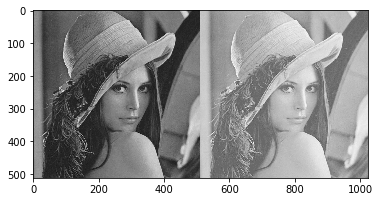

In [21]:
bimg = cv2.LUT(img,gammaLUT(2.2))
plt.imshow(np.hstack([img,bimg]), cmap = 'gray')

### Text 쓰기

(512, 512)
(512, 512, 3)


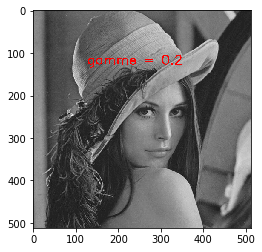

In [30]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
print(col.shape)

#(이미지, 텍스트, 위치, 폰트, 글씨 크기, 색깔(RGB) ,굵기)
cv2.putText(col, "gamme = 0.2", (127,127),
           cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)

plt.imshow(col)

### git 만들기

In [ ]:
from PIL import Image
img = cv2.imread("suna.jpg")
col = cv2.LUT(img, gammaLUT(0.5))
cv2.putText(col, "gamma=0.5", (10,30), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g1.jpg", np.hstack([img, col]))

img = cv2.imread("suna.jpg")
col = cv2.LUT(img, gammaLUT(1.2))
cv2.putText(col, "gamma=1.2", (10,30), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g2.jpg", np.hstack([img, col]))

img = cv2.imread("suna.jpg")
col = cv2.LUT(img, gammaLUT(2.5))
cv2.putText(col, "gamma=2.5", (10,30), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g3.jpg", np.hstack([img, col]))

img = cv2.imread("suna.jpg")
col = cv2.LUT(img, gammaLUT(3.0))
cv2.putText(col, "gamma=3.0", (10,30), 
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g4.jpg", np.hstack([img, col]))

img1 = Image.open('g1.jpg')
img2 = Image.open('g2.jpg')
img3 = Image.open('g3.jpg')
img4 = Image.open('g4.jpg')

img1.save("out3.gif", save_all=True, append_images=[img2, img3, img4],
        duration=1000, loop=0)


<img src = 'out3.gif?3443'>


### 한글처리 


In [1]:

img = cv2.imread('suna.jpg')
imgPIL = Image.fromarray(cv2.cvtColor(img,  cv2.COLOR_BGR2RGB))

font = ImageFont.truetype("H2GTRM.TTF",20)

draw = ImageDraw.Draw(imgPIL)
draw.text((10,10) , "안녕", font = font, fill = (255,0,0))
imgPIL.save("out.jpg")



NameError: name 'cv2' is not defined

In [ ]:
img = cv2.imread("lena.png", cv2.IMRE)

kernel = np.array([[0,0,0],
                  [1,0,-1],
                  [0,0,0]])

filtered =cv2.filter2(img,-1.kernel)
print(filtered)
